![](./pics/asteroids-header.jpg)

# Player Ship

## References

- wikipedia: [Rotation Matrix](https://en.wikipedia.org/wiki/Rotation_matrix)

## Drawing Player Ship

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi, cos, sin

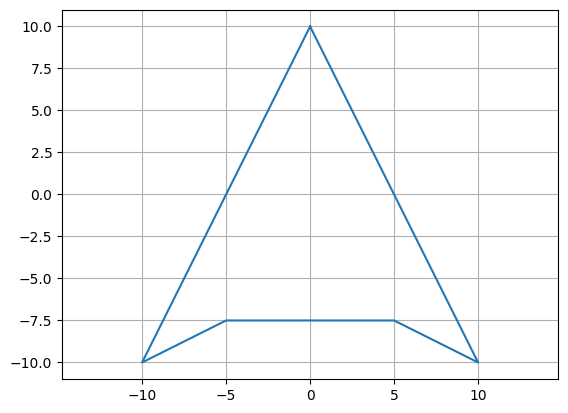

In [6]:
pts = np.array([
    (0,10),
    (10,-10),
    (5,-7.5),
    (-5,-7.5),
    (-10,-10),
    (0,10)
])

plt.plot(pts[:,0],pts[:,1])
plt.grid(True)
plt.axis("equal");

## Rotating the Player Ship

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Counterclockwise_rotation.png" width="25%">

$$
\begin{bmatrix} x^\prime \\ y^\prime \end{bmatrix} = 
\begin{bmatrix} 
    \cos \theta & -\sin \theta \\ 
    \sin \theta & \cos \theta 
\end{bmatrix} \\
\begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
\begin{array}
xx^\prime &= x \cos \theta - y \sin \theta \\
y^\prime &= x \sin \theta + y \cos \theta
\end{array}
$$

In [13]:
def rotate(pts, angle):
    a = angle * pi / 180.0
    rot = np.array([[cos(a), -sin(a)],[sin(a),cos(a)]])
    return pts @ rot

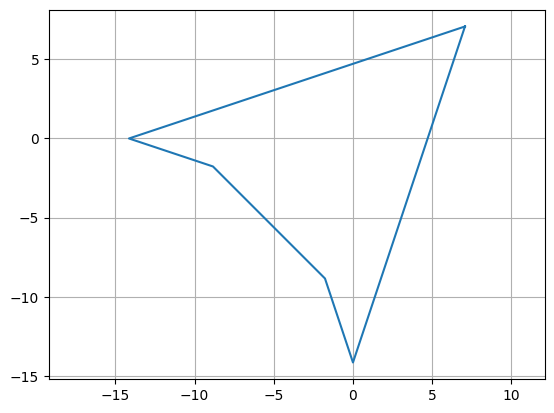

In [14]:
rpts = rotate(pts, 45)

plt.plot(rpts[:,0],rpts[:,1])
plt.grid(True)
plt.axis("equal");

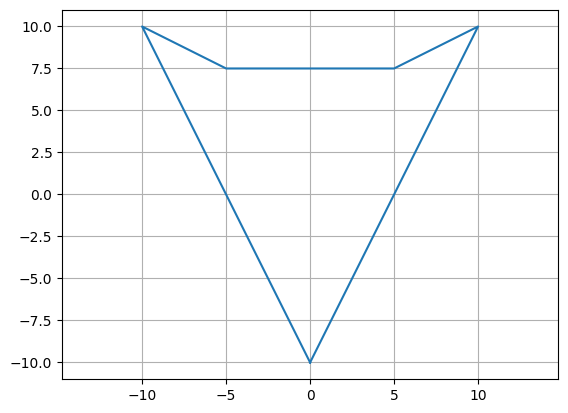

In [15]:
rpts = rotate(pts, -180)

plt.plot(rpts[:,0],rpts[:,1])
plt.grid(True)
plt.axis("equal");

## Rotate and Translate (Move)

$$
\begin{bmatrix} x^\prime \\ y^\prime \end{bmatrix} = 
\begin{bmatrix} 
    \cos \theta & -\sin \theta \\ 
    \sin \theta & \cos \theta 
\end{bmatrix} \\
\begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} a \\ b \end{bmatrix}
$$

$$
\begin{array}
xx^\prime &= x \cos \theta - y \sin \theta + a\\
y^\prime &= x \sin \theta + y \cos \theta + b
\end{array}
$$

In [16]:
def rotate_and_move(pts, angle, move):
    a = angle * pi / 180.0
    rot = np.array([[cos(a), -sin(a)],[sin(a),cos(a)]])
    return pts @ rot + move

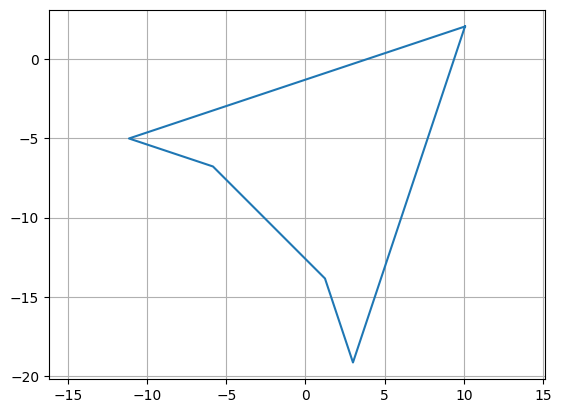

In [19]:
rpts = rotate_and_move(pts, 45, [3,-5])

plt.plot(rpts[:,0],rpts[:,1])
plt.grid(True)
plt.axis("equal");

## Wrapping

You could wrap the Bullet and Player like this:
 
```python
def wrap(obj):
    if obj.y < 0: obj.y = self.screen.height
    elif obj.y > self.screen.height: obj.y = 0
    if obj.x < 0: obj.x = self.screen.width
    elif obj.x > self.screen.height: obj.x = 0
```
 
Not sure if you want to do this with Asteroids.
Now for the Player and Asteroids, they are big and will immediately partially
disappear in one place and reappear in another. This kind of sucks, so let’s
let them completely disappear before we move them.
 
```python
If obj.y < -obj.radius: obj.y = self.screen.height + obj.radius
```
 
Now once every pixel of the object is gone, then it will start to reappear
on the other side of the screen. You can repeat this idea for the remaining
x and y values.